In [ ]:
import pandas as pd          #importing libaray funtion pandas for data manipulation and numpy for numerical calculation
import numpy as np
import matplotlib.pyplot as plt     #Matplotlib and Seaborn have been used for Data visualizations.
import seaborn as sns


In [ ]:
data=pd.read_csv('retail_sales_dataset.csv') # reading dataset

In [ ]:
data.head()  # display the top 5 observations of the dataset
data.tail()  #display the last 5 observations of the dataset

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,50
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,90
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,100
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,150
999,1000,12-04-2023,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
data.info() # get data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
#rows and colums of dataset
data.shape

(1000, 9)

In [ ]:
data.nunique() # states unique valuesin data set


,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


In [ ]:
 data.isnull().sum()   #used to get the number of missing records in each column

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
#describe data based on statistical analysis
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**From Above Data we can conclude :**
1.No duplicate values

2.No Null values

3.Customer Age ranges from 18 to 64 years

4.Most Customers buy from 1 to 4 items (Quantity)

5.High variance between price per unit and  total amount




#  How does Customer age and gender influence their Purchasing Behaviour (Customer and product Analysis)

In [ ]:
data["Age"].corr(data["Total Amount"])  # No Correlation between Age and Total amount

np.float64(-0.0605680238830457)

In [ ]:
age_to_gender_Purchase_behaviour=data.groupby(["Age","Gender"])["Total Amount"].sum()
age_to_gender_Purchase_behaviour

Age  Gender
18   Female    7940
     Male      3275
19   Female    7335
     Male      7535
20   Female    5175
               ... 
62   Male      5060
63   Female    1205
     Male      8045
64   Female    6325
     Male      2800
Name: Total Amount, Length: 94, dtype: int64

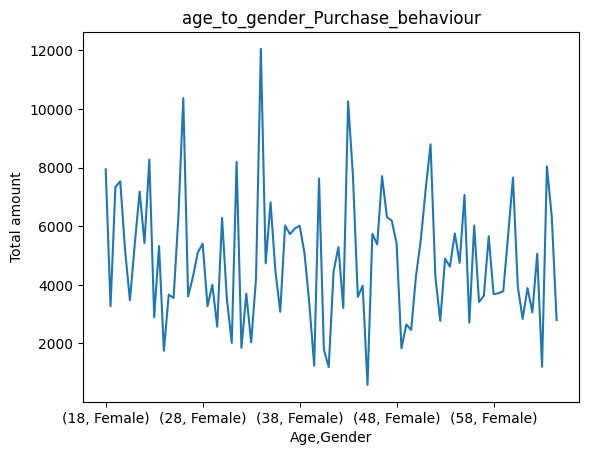

In [ ]:
import matplotlib.pyplot as plt
age_to_gender_Purchase_behaviour.plot(kind="line")
plt.title("age_to_gender_Purchase_behaviour")
plt.ylabel("Total amount")
plt.show()

In [ ]:
#Reset index to make age accessible

age_to_gender_Purchase_behaviour = age_to_gender_Purchase_behaviour.reset_index()
 # Sort values by 'Age' as a column
age_to_gender_Purchase_behaviour = age_to_gender_Purchase_behaviour.sort_values(by='Age')
age_to_gender_Purchase_behaviour


,Age,Gender,Total Amount
0,18,Female,7940
1,18,Male,3275
2,19,Female,7335
3,19,Male,7535
4,20,Female,5175
...,...,...,...
89,62,Male,5060
90,63,Female,1205
91,63,Male,8045
92,64,Female,6325


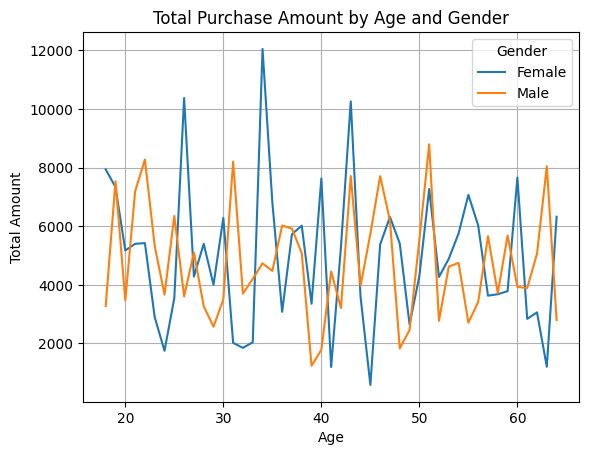

In [ ]:

import matplotlib.pyplot as plt

# Create the line chart
for gender in age_to_gender_Purchase_behaviour['Gender'].unique():
    subset = age_to_gender_Purchase_behaviour[age_to_gender_Purchase_behaviour['Gender'] == gender]
    plt.plot(subset['Age'], subset['Total Amount'], label=gender)

# Customize the plot
plt.title("Total Purchase Amount by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.legend(title="Gender")
plt.grid(True)

# Display the plot
plt.show()

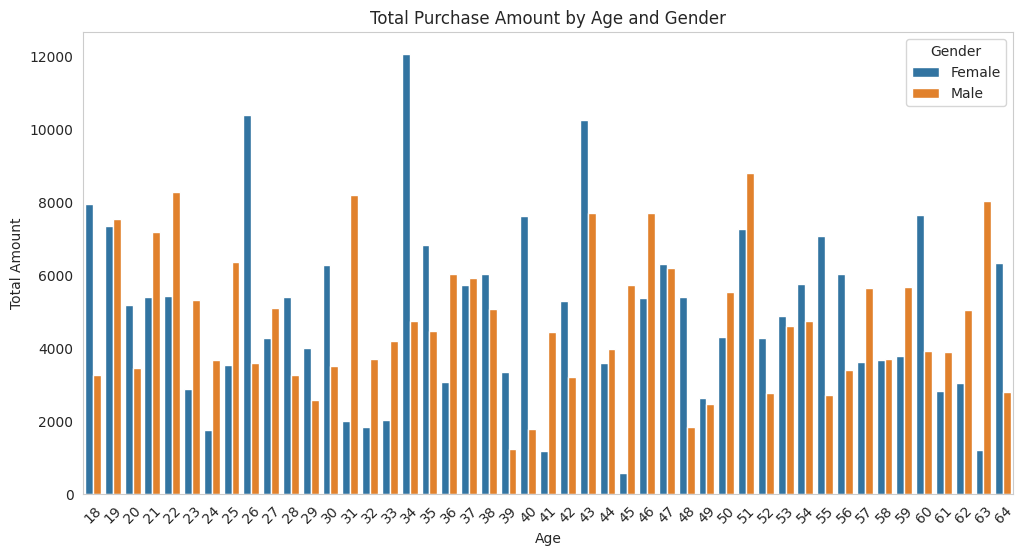

In [ ]:
import seaborn as sns
#set plot style
sns.set_style("whitegrid")
# plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x='Age', y='Total Amount', hue='Gender', data=age_to_gender_Purchase_behaviour)

plt.title("Total Purchase Amount by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.legend(title="Gender")
plt.grid(False)
plt.xticks(rotation=45)
plt.show()


#Conclusion
**It is seen that female with age between 25 and 40 has high purchasing amount
than Male**

# Patterns In sales across different Time period

In [ ]:
data.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [ ]:
type(data['Date'][0]) # check datatype

str

In [ ]:
from datetime import datetime
from datetime import date
import pandas as pd
#convert date column to datetime format
data['Date']= pd.to_datetime(data['Date'], format='%d-%m-%Y',errors='coerce')



In [ ]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
type(data['Date'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
Total_sales_per_date=data.groupby('Date')['Total Amount'].sum()
Total_sales_per_date

,Total Amount
Date,
2023-01-01,3600
2023-01-02,1765
2023-01-03,600
2023-01-04,1240
2023-01-05,1100
...,...
2023-12-27,700
2023-12-28,2075
2023-12-29,3400


In [ ]:
data['Date'].unique().year


array([2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 20

In [ ]:
data['Date'].unique().month
 # unique months

array([11,  2,  1,  5,  5,  4,  3,  2, 12, 10,  2, 10,  8,  1,  1,  2,  4,
        4,  9, 11,  1, 10,  4, 11, 12,  8,  4,  8, 10,  5,  1,  3, 12,  6,
        3,  4,  6,  7,  2,  7,  6, 11,  5,  1,  8, 10,  3,  7,  2, 10,  5,
       11, 11,  7, 10,  4, 12,  2,  1, 12,  4,  5,  2,  8, 11,  7,  3,  7,
        7,  4, 12,  5, 12, 11,  2, 11,  3, 10,  8,  5, 12, 10, 12,  6,  1,
        4,  6,  7,  5,  2,  4, 10, 12,  9,  7, 11,  8,  3,  5, 10,  5, 10,
        8, 10,  7,  3,  9,  9,  2,  1,  2,  3, 12, 11,  2,  7,  7,  8,  9,
        5, 10,  1,  2, 11,  8,  3,  1,  9,  4,  9,  2, 11,  6,  7,  3, 10,
        9,  1, 11,  6,  9,  1,  6,  5,  1,  5,  2,  9,  9,  3,  3, 12,  9,
       10,  3, 11, 12,  4,  1,  6,  8,  9,  8,  3,  4,  6,  1, 12, 11,  1,
        2,  6,  9,  5, 12,  4,  3, 10,  8,  5,  7,  4,  2,  8,  7,  1, 12,
       12, 11,  2,  2,  7,  2,  5,  4,  2,  8,  1, 11,  1,  3,  9,  7,  5,
       12, 10,  9,  6, 10, 10,  6,  9,  9,  2,  4, 11, 12,  5, 10,  1, 11,
       12, 10,  9,  5,  4

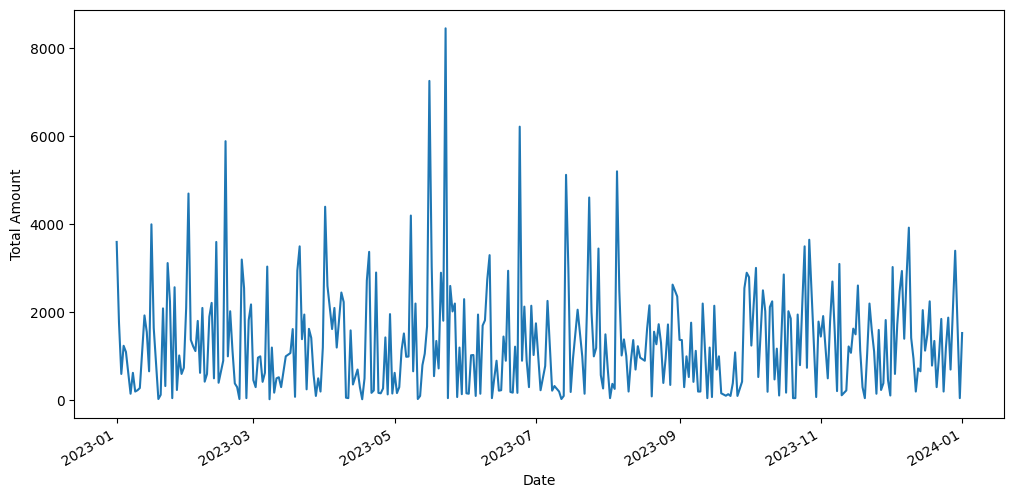

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
Total_sales_per_date.plot(kind='line')
plt.title=("Total_sales_per_date")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.grid(False)
plt.show()

# Conclusion
**From the Chart we can see the Sales is high in between fifth to nineth Month**

In [ ]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


# **Which product categories hold highest appeal among customer**

In [ ]:
data.head(8)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100


In [ ]:
data["Product Category"].unique()   #unique category

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
#highest product quantity per unit price
product_with_highest_cust_max=data.groupby("Product Category").max()
product_with_highest_cust_max

,Transaction ID,Date,Customer ID,Gender,Age,Quantity,Price per Unit,Total Amount
Product Category,,,,,,,,
Beauty,998,2024-01-01,CUST998,Male,64,4,500,2000
Clothing,996,2023-12-28,CUST996,Male,64,4,500,2000
Electronics,1000,2024-01-01,CUST999,Male,64,4,500,2000


In [ ]:
# check the quantity at four that has max amount
data[data['Quantity']==4].max()

,0
Transaction ID,1000
Date,2023-12-29 00:00:00
Customer ID,CUST998
Gender,Male
Age,64
Product Category,Electronics
Quantity,4
Price per Unit,500
Total Amount,2000



#Conclusion
**Id no 1000 has maximum amount of 2000 and highest purchase**

In [ ]:
product_with_highest_cust_persales=data.groupby("Product Category")['Total Amount'].sum()
product_with_highest_cust_persales

,Total Amount
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


Text(0, 0.5, 'Total Amount')

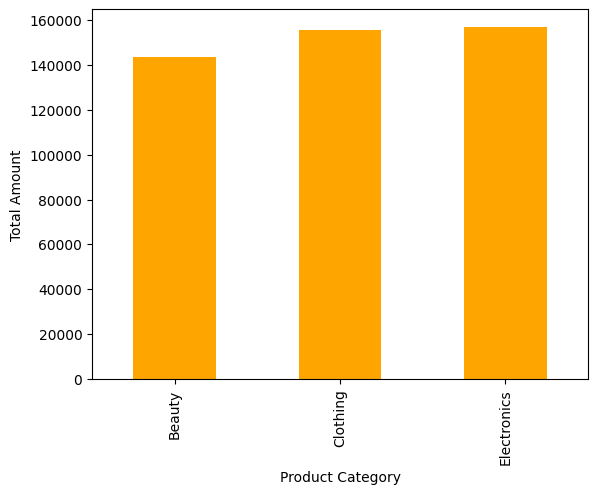

In [ ]:
product_with_highest_cust_persales.plot(kind='bar',color='Orange', grid=False)
plt.title=("Total Purchase Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")


<Axes: >

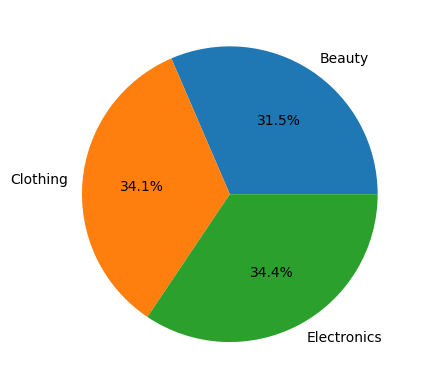

In [ ]:
product_with_highest_cust_persales.plot(kind='pie', autopct='%1.1f%%', ylabel="")

# Conclusion

**It Shows that Electronics Category has Highest Purchasing Power**

# Customers Shopping Habits During Seasonal Trends

---



In [ ]:
# Seasonal Trend based on montly and quarterly trends
# Extract year, Month and Quarter from date

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['quarter'] = data['Date'].dt.quarter

In [ ]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [ ]:
data['year'].unique()

array([2023, 2024], dtype=int32)

In [ ]:
data['month'].unique()

array([11,  2,  1,  5,  4,  3, 12, 10,  8,  9,  6,  7], dtype=int32)

In [ ]:
data['quarter'].unique()

array([4, 1, 2, 3], dtype=int32)

In [ ]:
#Monthly Trend
month_trend=data.groupby('month')['Total Amount'].sum().reset_index()
month_trend

,month,Total Amount
0,1,36980
1,2,44060
2,3,28990
3,4,33870
4,5,53150
5,6,36715
6,7,35465
7,8,36960
8,9,23620
9,10,46580


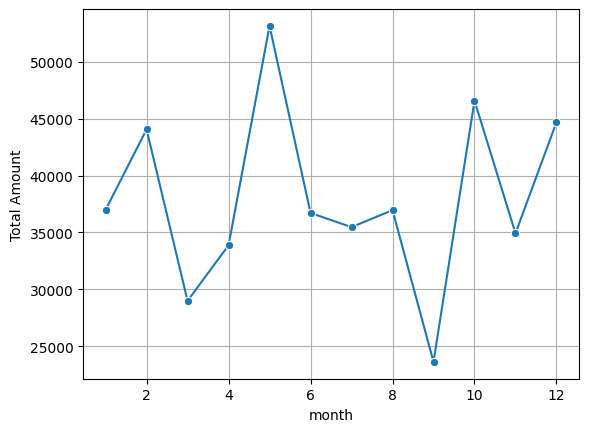

In [ ]:
import seaborn as sns
sns.lineplot(x='month', y="Total Amount", data=month_trend, marker="o")  # Pass the DataFrame variable, not its name as a string
plt.title=("Month vs Total Amount")
plt.grid()

# Conclusion

**From the Chart we can conclude more sales are made in the Fith Month**

In [ ]:
#Quarterly Trend
Quarter_trend=data.groupby('quarter')['Total Amount'].sum().reset_index()
Quarter_trend

,quarter,Total Amount
0,1,110030
1,2,123735
2,3,96045
3,4,126190


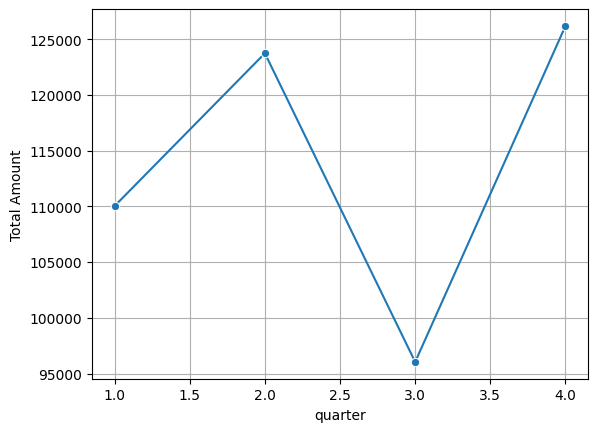

In [ ]:
import seaborn as sns
sns.lineplot(x='quarter', y="Total Amount", data=Quarter_trend, marker="o")  # Pass the DataFrame variable, not its name as a string
plt.title=("quarter vs Total Amount")
plt.grid()

# Conclusion

**From the chart we can determine that there is a close range of sales for both 2nd and 4th Quarter of year**

# Distinct Purchasing Behaviour based on numbr of items bought per transaction

Text(0, 0.5, 'Total Amount')

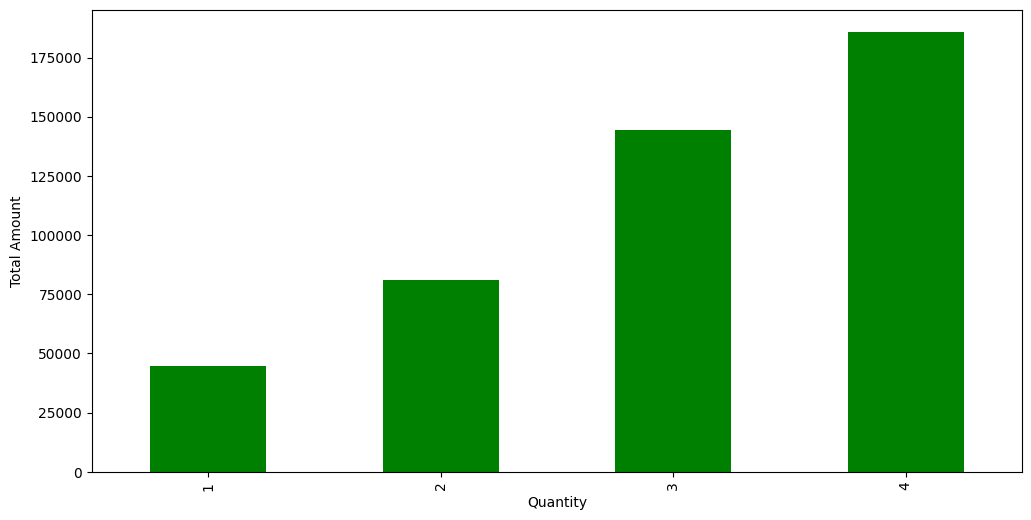

In [ ]:
plt.figure(figsize=(12, 6))
quantity_to_purchasing_behaviour=data.groupby('Quantity')['Total Amount'].sum()
quantity_to_purchasing_behaviour.plot(kind='bar',color='green',grid=False)
plt.title=("Total Purchasing amount by Quantity")
plt.xlabel('Quantity')
plt.ylabel('Total Amount')




# Conclusion

**There are distinct Purchasing behaviour based on number of items bought per transaction**

# What insights can be drawn from distribution of product price with each category

Text(0, 0.5, 'Price per unit')

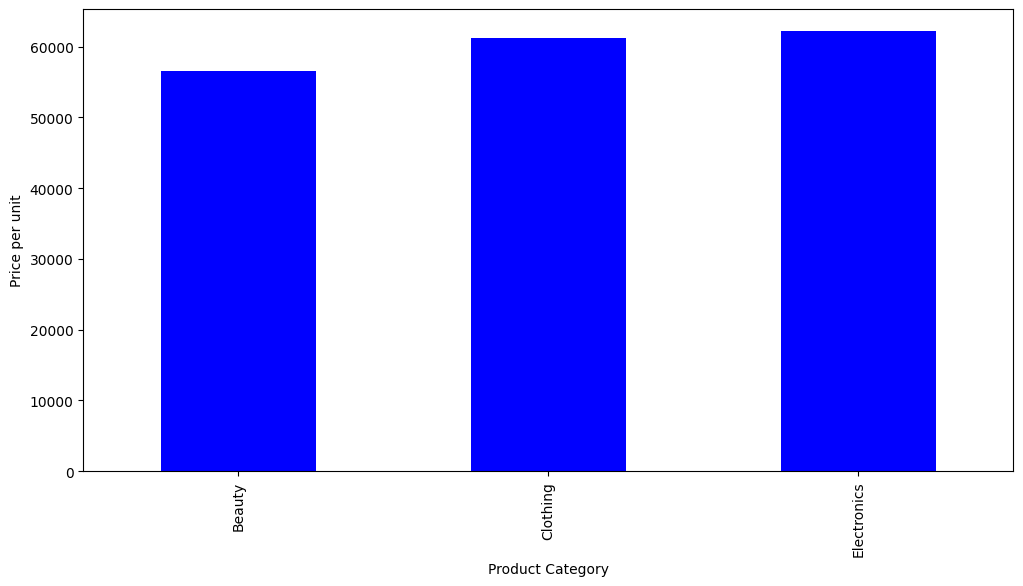

In [ ]:
plt.figure(figsize=(12, 6))
Product_price_to_product_Category=data.groupby('Product Category')['Price per Unit'].sum()
Product_price_to_product_Category.plot(kind='bar',color='b',grid=False)
plt.title=("Price per unit vs Product Category")
plt.xlabel('Product Category')
plt.ylabel('Price per unit')

# Conclusion
**Electronics category has slightly higher price per unit**